In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
full_dataset = pd.read_csv('combined_data.csv')
stress_conditions = [name.split('_')[0] for name in full_dataset.columns if 'TPM' in name]


Unnamed: 0                                            Species  \
33990       33990                       Escherichia coli ETEC H10407   
34000       34000                       Escherichia coli ETEC H10407   
34109       34109                       Escherichia coli ETEC H10407   
51607       51607  Klebsiella pneumoniae subsp. pneumoniae MGH 78578   
71594       71594  Salmonella enterica subsp. enterica serovar Ty...   

      Chromosome                                 Region  As_1 (GE) - TPM  \
33990  NC_017721                join(5124..5175,1..175)         0.000000   
34000  NC_017722  complement(join(66646..66681,1..216))       145.317840   
34109  NC_017724              join(93910..94797,1..684)         0.000000   
51607  NC_009652      complement(join(4042..4259,1..7))       384.302609   
71594  NC_017718              join(86864..86908,1..162)        14.354055   

       As_2 (GE) - TPM  As_3 (GE) - TPM  Bs_1 (GE) - TPM  Bs_2 (GE) - TPM  \
33990         0.000000         0.000000         0.000000         0.000000   
34000       119.050356       135.413396        88.856668        99.017775   
34109         0.000000         0.000000         0.000000         0.000000   
51607       433.169398       602.153592       337.975159       385.897344   
71594        15.080124        10.250327        13.879497        23.555211   

       Bs_3 (GE) - TPM  ...  Sp_2 (GE) - TPM  Sp_3 (GE) - TPM  \
33990         0.000000  ...         0.000000         0.000000   
34000       108.720020  ...       259.247722       862.956591   
34109         0.000000  ...         0.000000         0.000000   
51607       308.697291  ...       255.356741        96.272049   
71594         6.718847  ...         0.000000        19.079436   

       Tm_1 (GE) - TPM  Tm_2 (GE) - TPM  Tm_3 (GE) - TPM  Vic_1 (GE) - TPM  \
33990         0.000000         0.000000         0.000000          0.000000   
34000       206.865325       267.367963       270.995126        198.102833   
34109         0.000000         0.000000         0.000000          0.000000   
51607       495.639392       763.273848       556.596354        240.237304   
71594        36.641897        28.689312        32.625499         42.592228   

       Vic_2 (GE) - TPM  Vic_3 (GE) - TPM  Species ID  \
33990          0.000000          0.000000        ETEC   
34000        343.897417        208.089884        ETEC   
34109          0.000000          0.000000        ETEC   
51607        394.408477        337.315136       KLEBS   
71594          0.000000          0.000000       SALMT   

                                             upstream200  
33990  ATTATAAGAAAAGAGCACCATATGCGGTGTGAAATGCCGCACAGAT...  
34000  ACCGGCTTACGCCGGGCTTCGGCGGTTTTACTCCGGTATCACATGT...  
34109  GTTGTGGGCTGACAGTGACGGACTGTGCCTCTTCACCAAACGCCTG...  
51607  AATTTAGCCATGTTCAGCGCTGTTTTCTGTTGTTTCGTCATAAGAG...  
71594  GACGAACATATGAACAAATATGCTCTTGTAGAGGCTGTTGTTACAC...  

[5 rows x 42 columns]

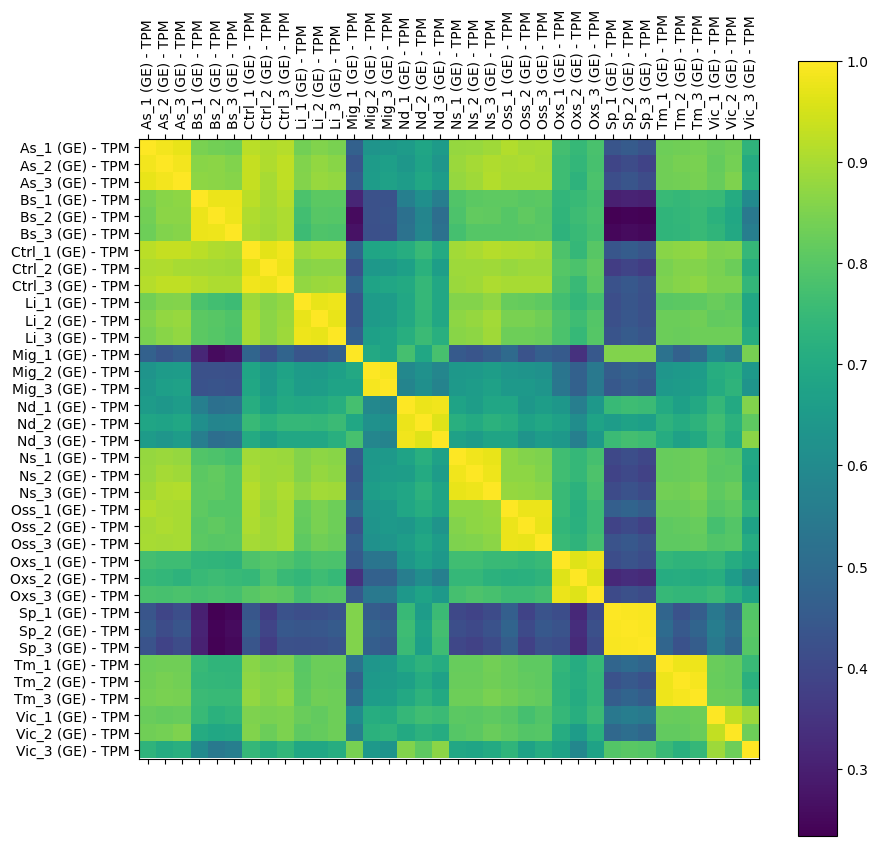

In [9]:
corrs = full_dataset[[name for name in full_dataset.columns if 'TPM' in name]].corr()

fig = plt.figure(figsize=(10, 10))
plt.matshow(corrs, fignum=fig.number)
plt.xticks(range(len(corrs.columns)), corrs.columns, rotation='vertical')
plt.yticks(range(len(corrs.columns)), corrs.columns)
plt.colorbar()
plt.show()


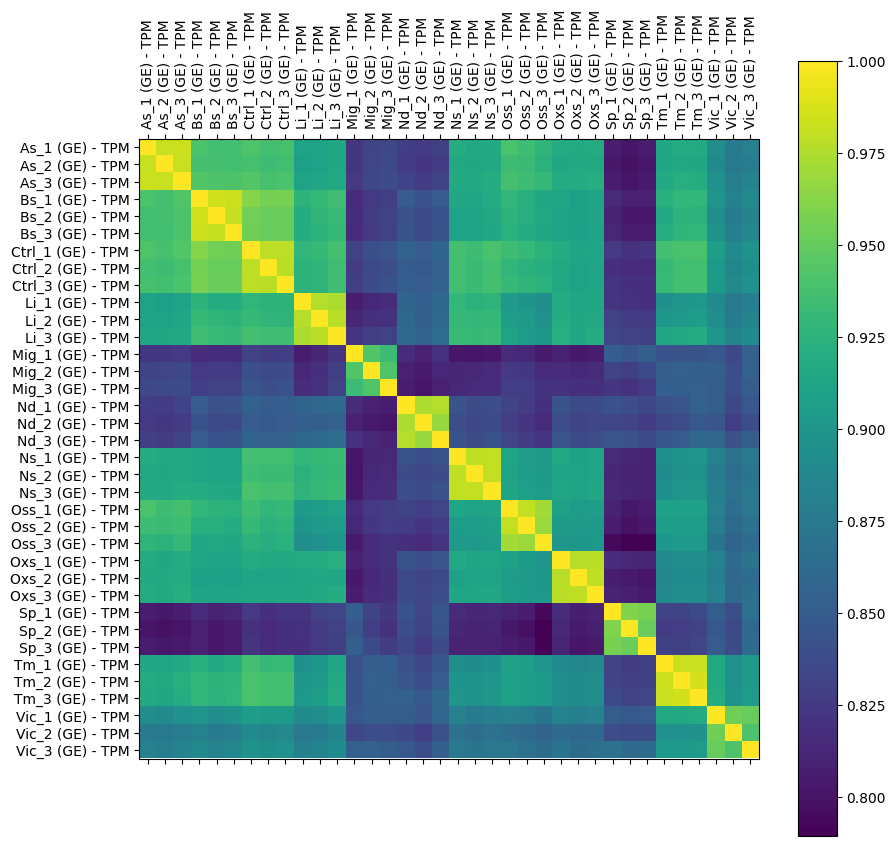

In [7]:
log_values = np.log(full_dataset[[name for name in full_dataset.columns if 'TPM' in name]] + 1)
log_corrs = log_values.corr()

fig = plt.figure(figsize=(10, 10))
plt.matshow(log_corrs, fignum=fig.number)
plt.xticks(range(len(log_corrs.columns)), log_corrs.columns, rotation='vertical')
plt.yticks(range(len(log_corrs.columns)), log_corrs.columns)
plt.colorbar()
plt.show()


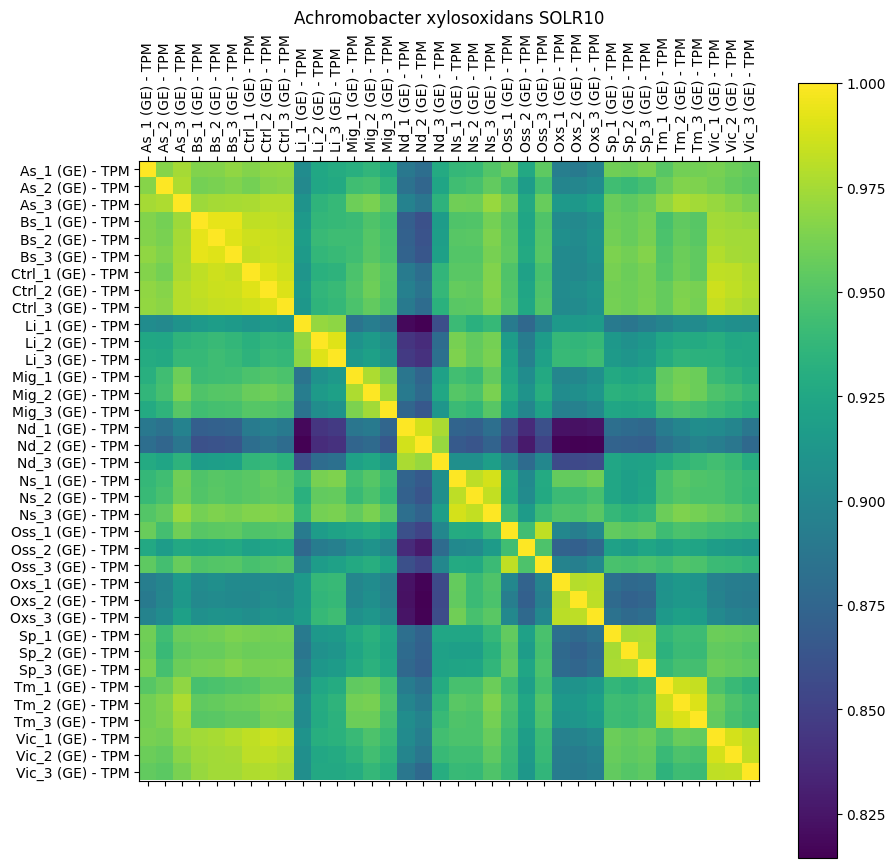

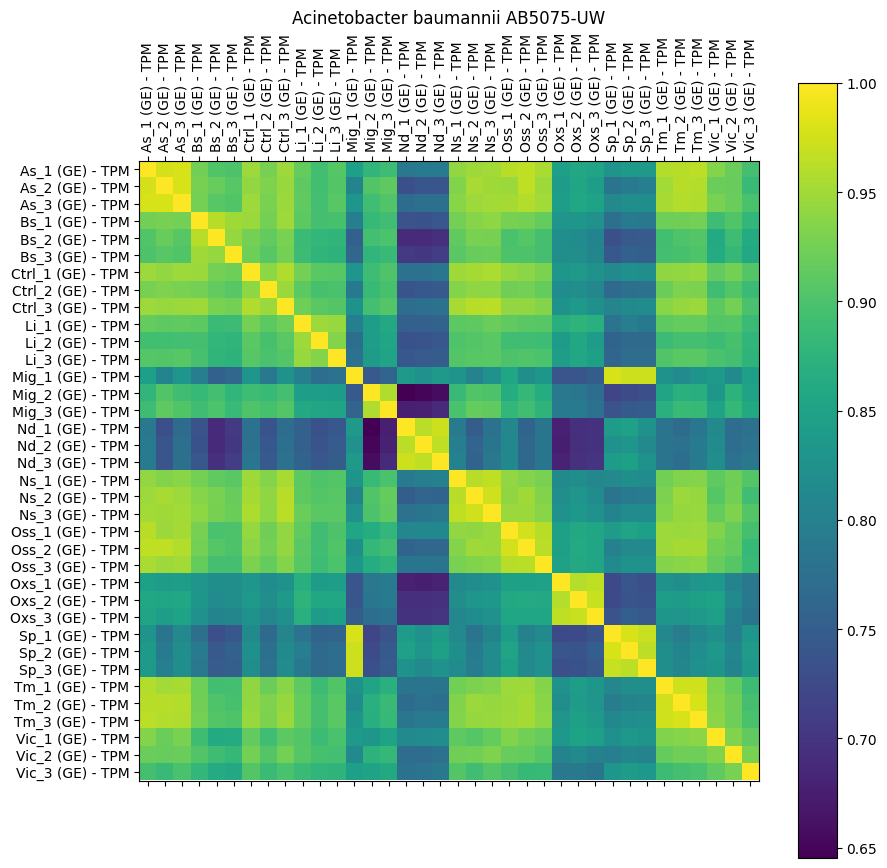

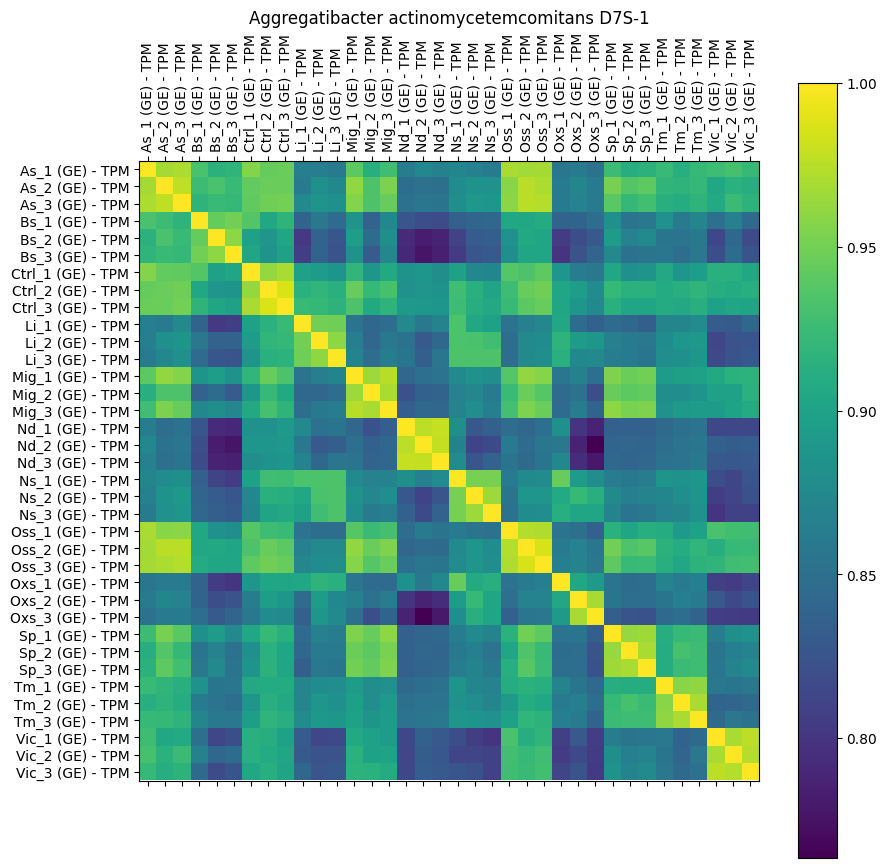

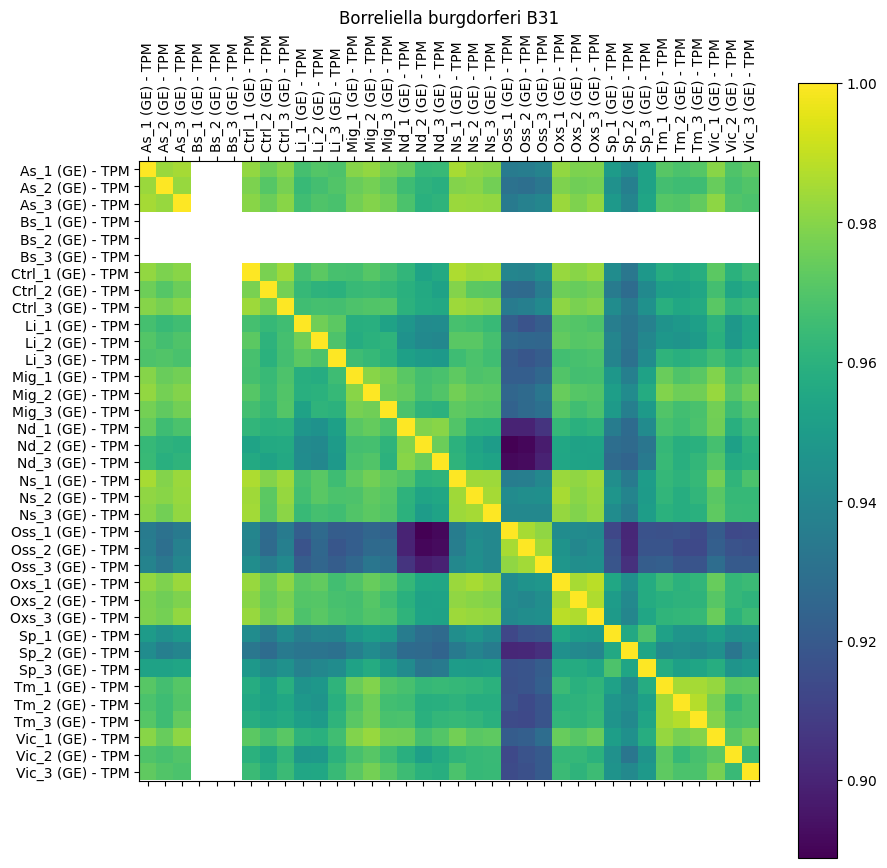

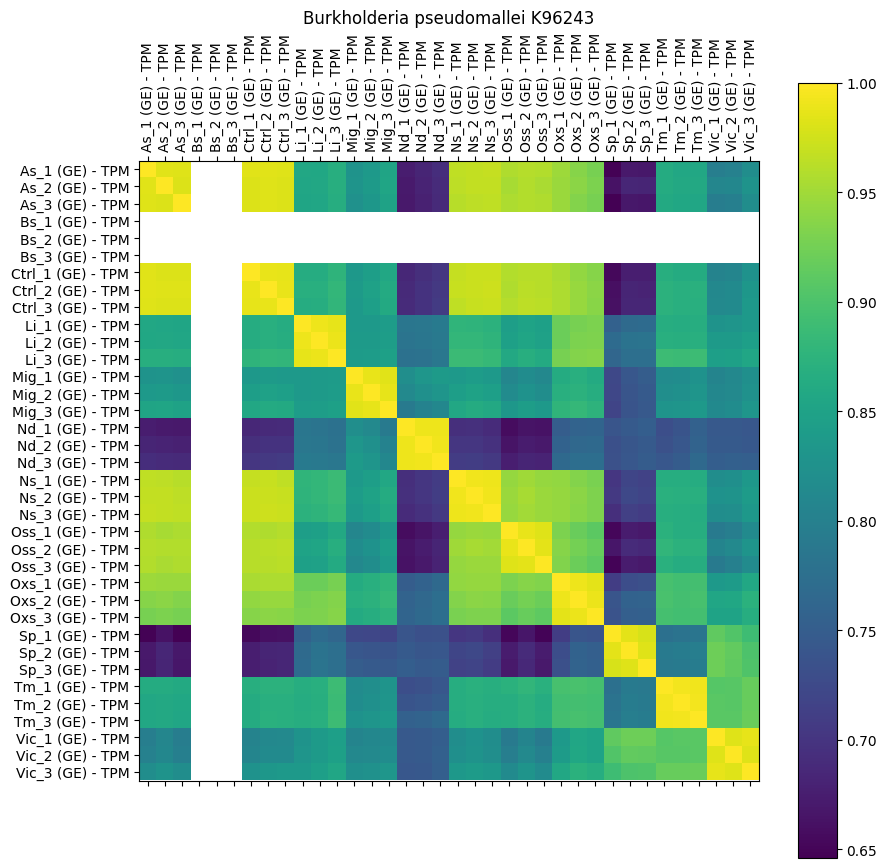

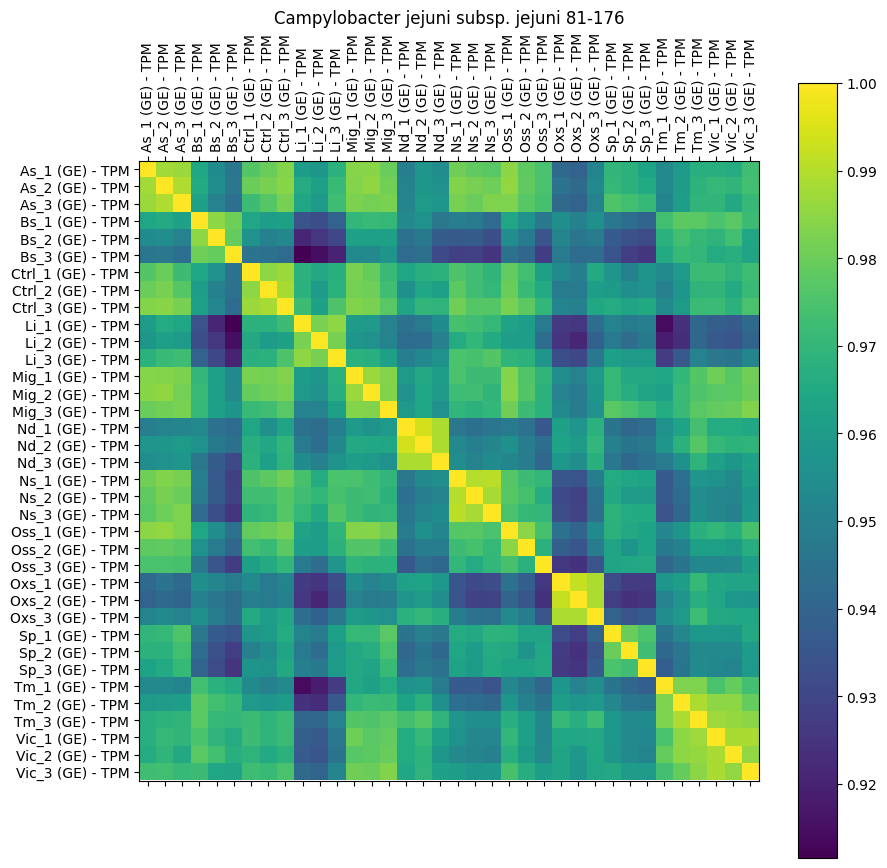

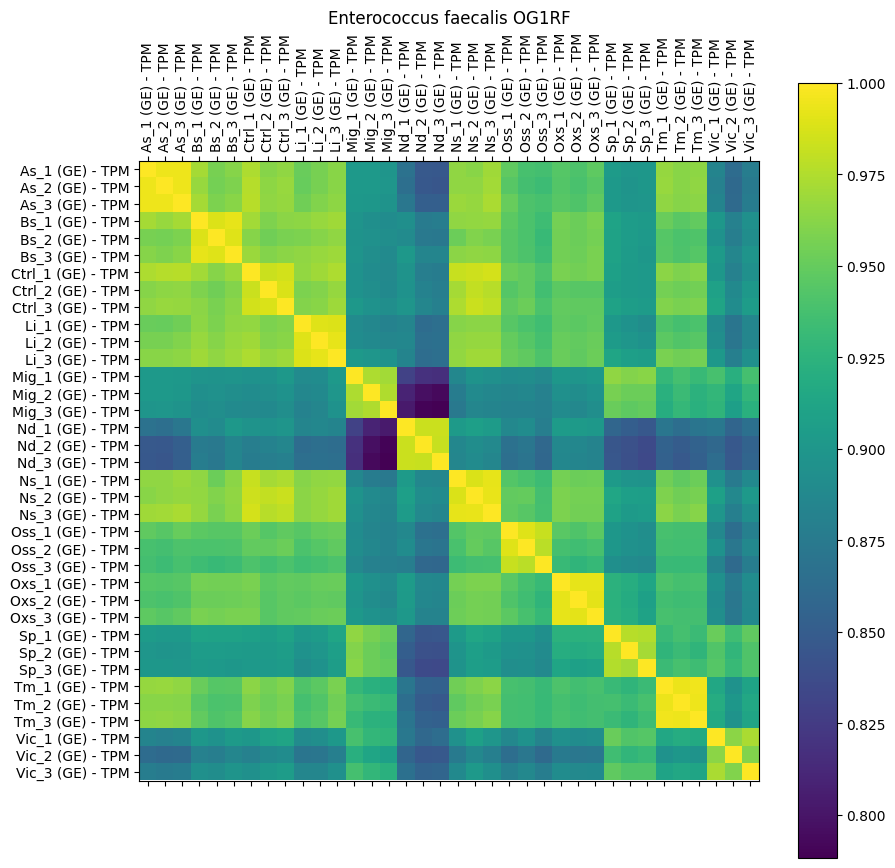

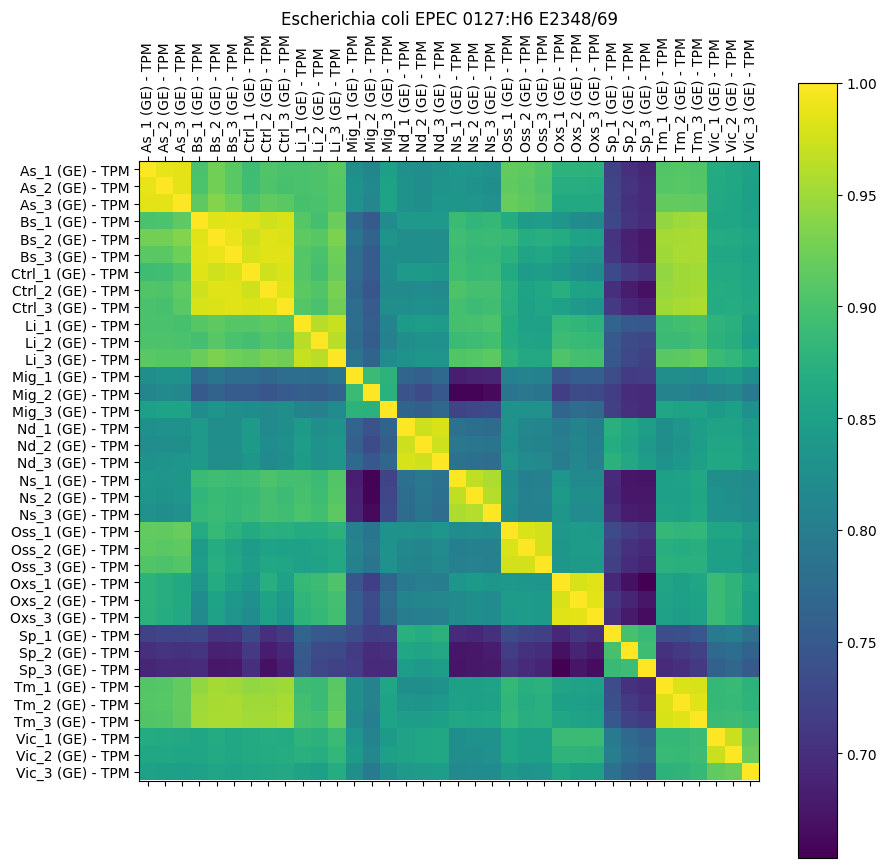

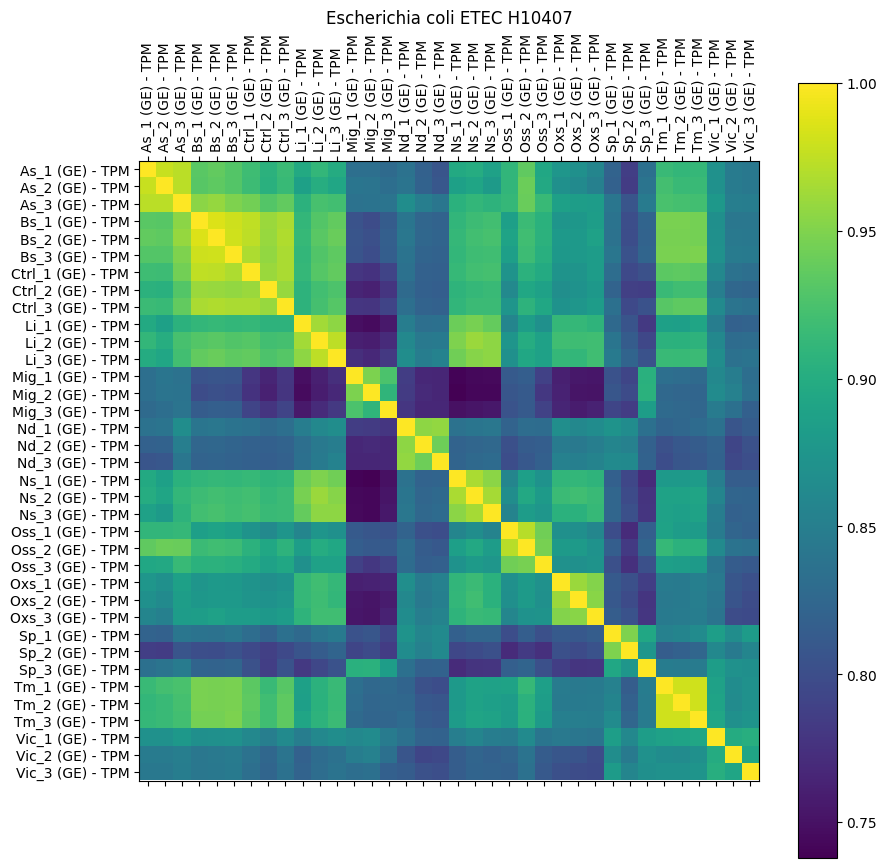

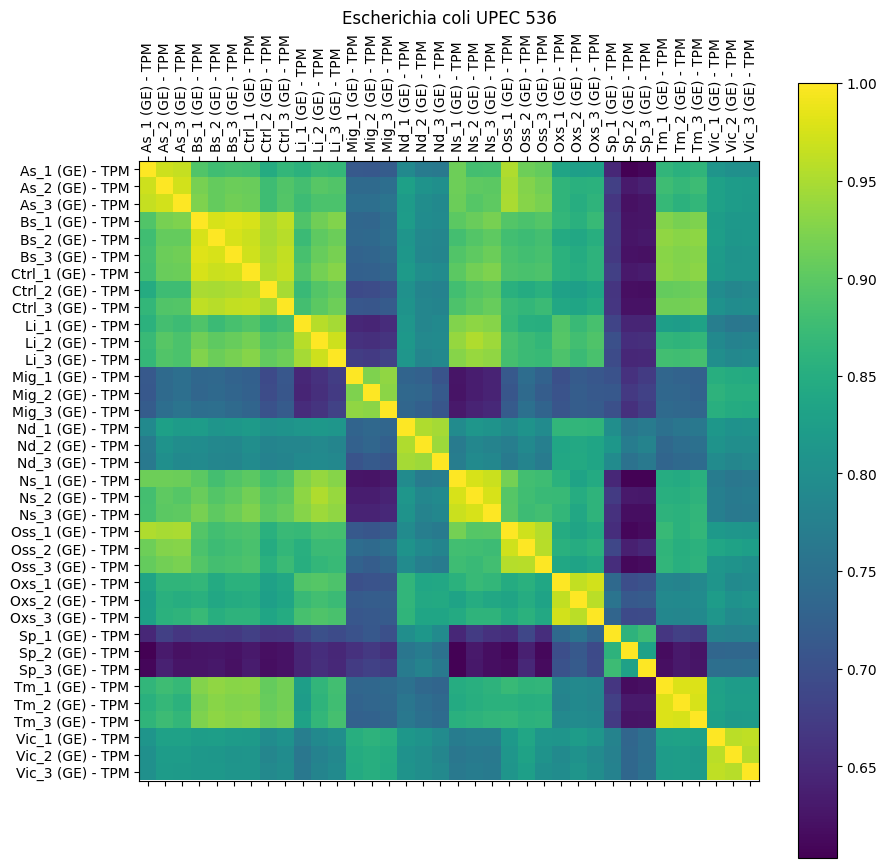

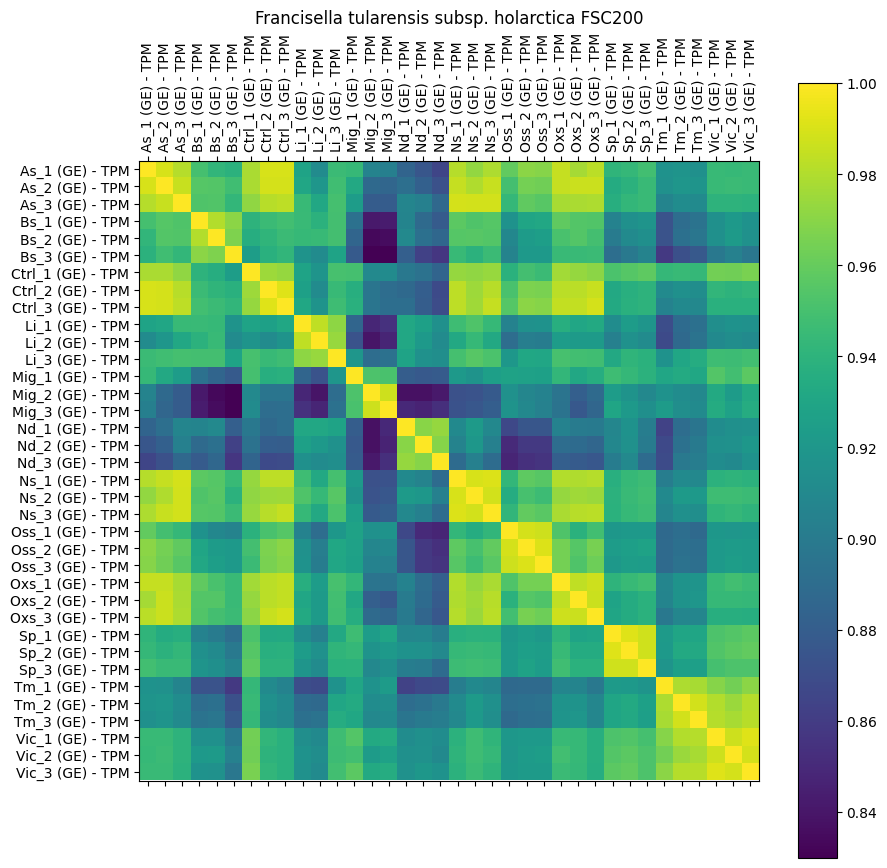

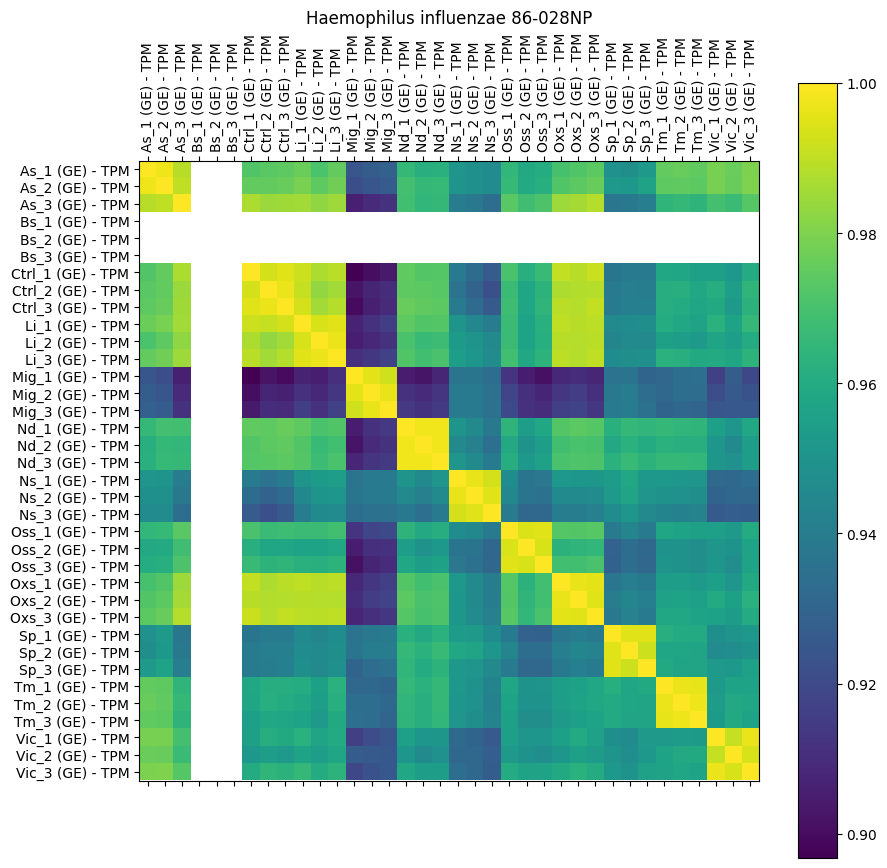

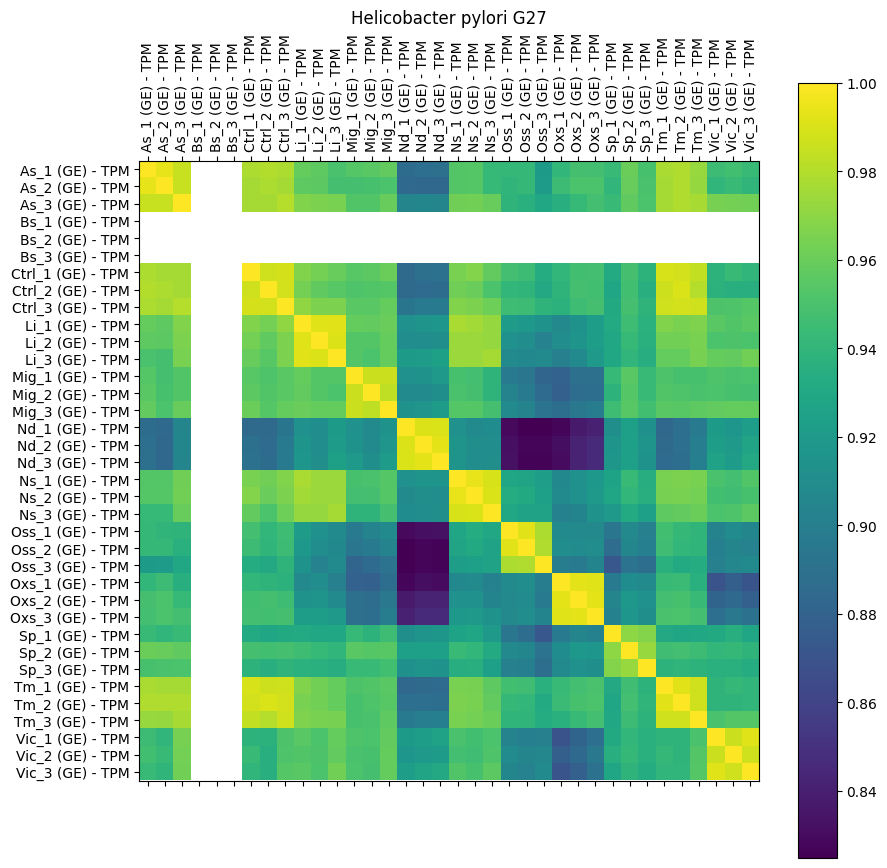

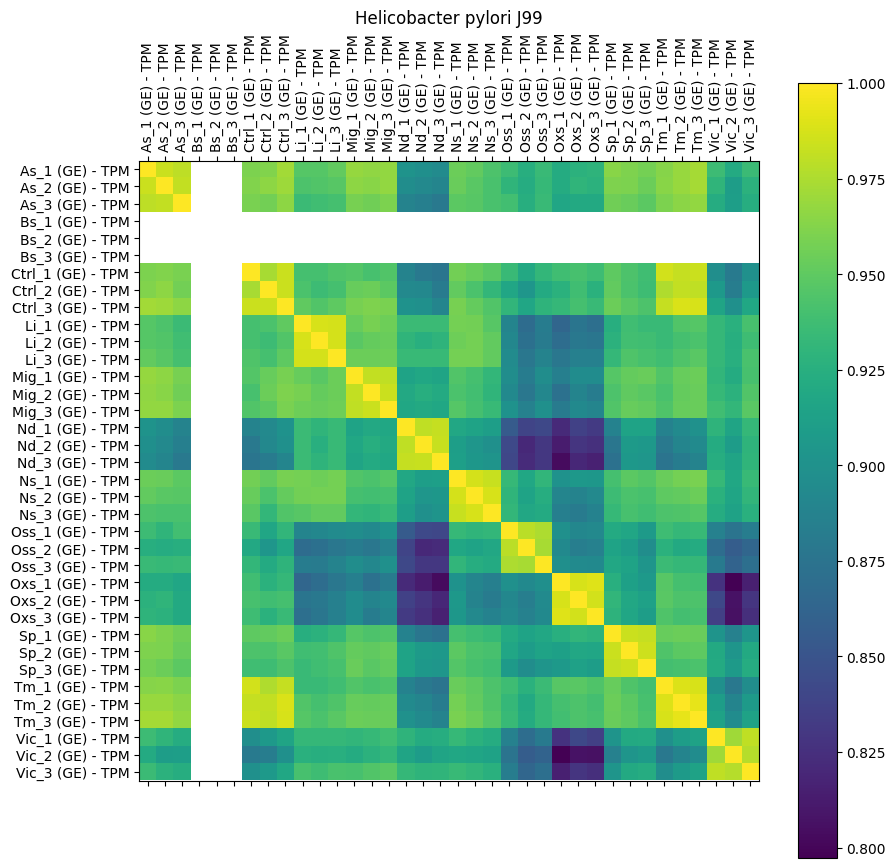

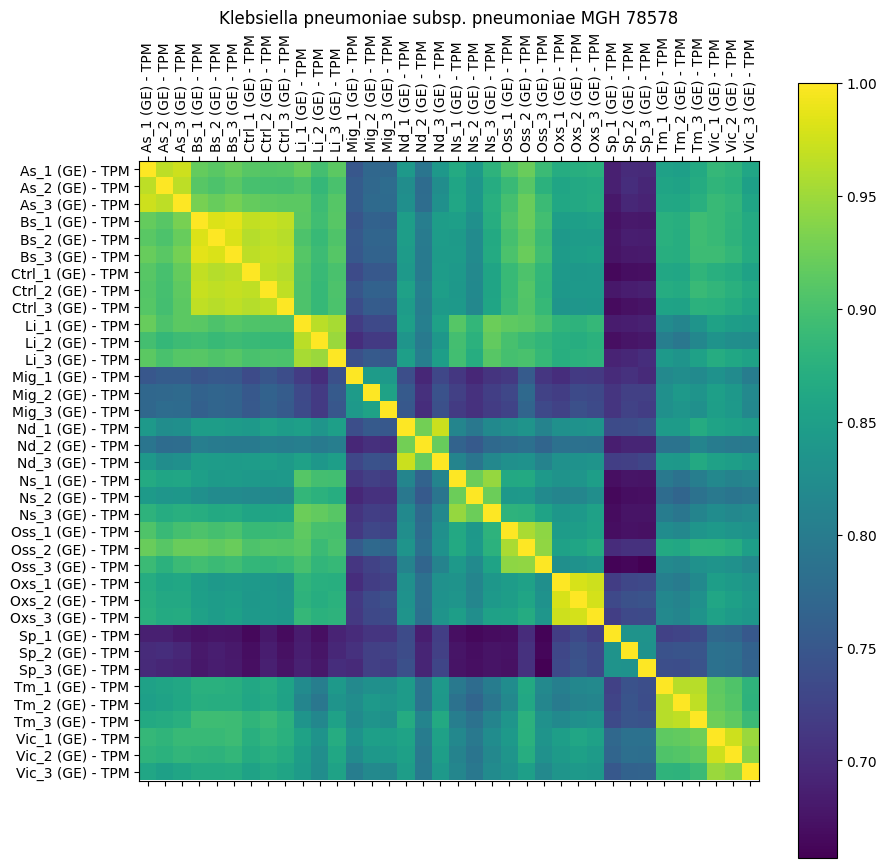

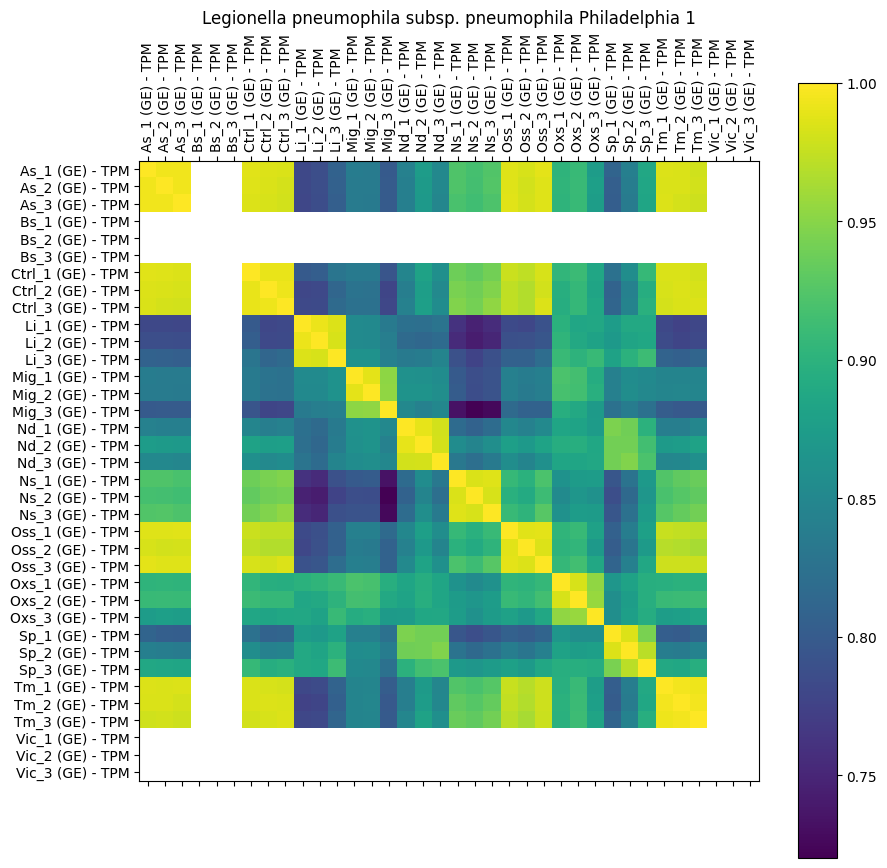

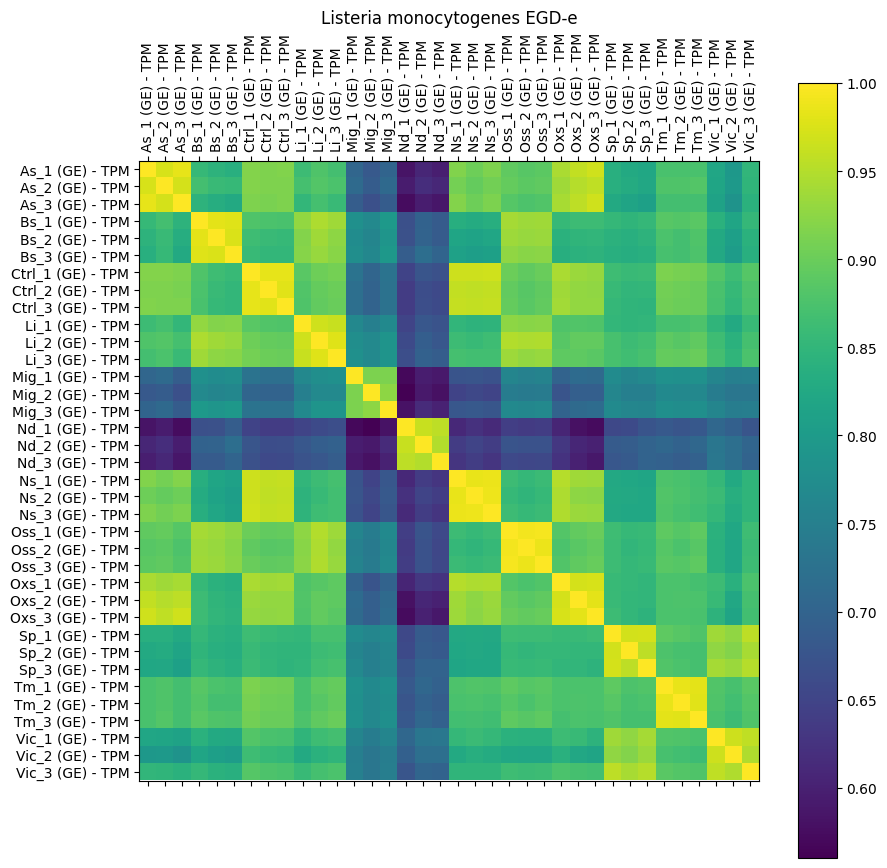

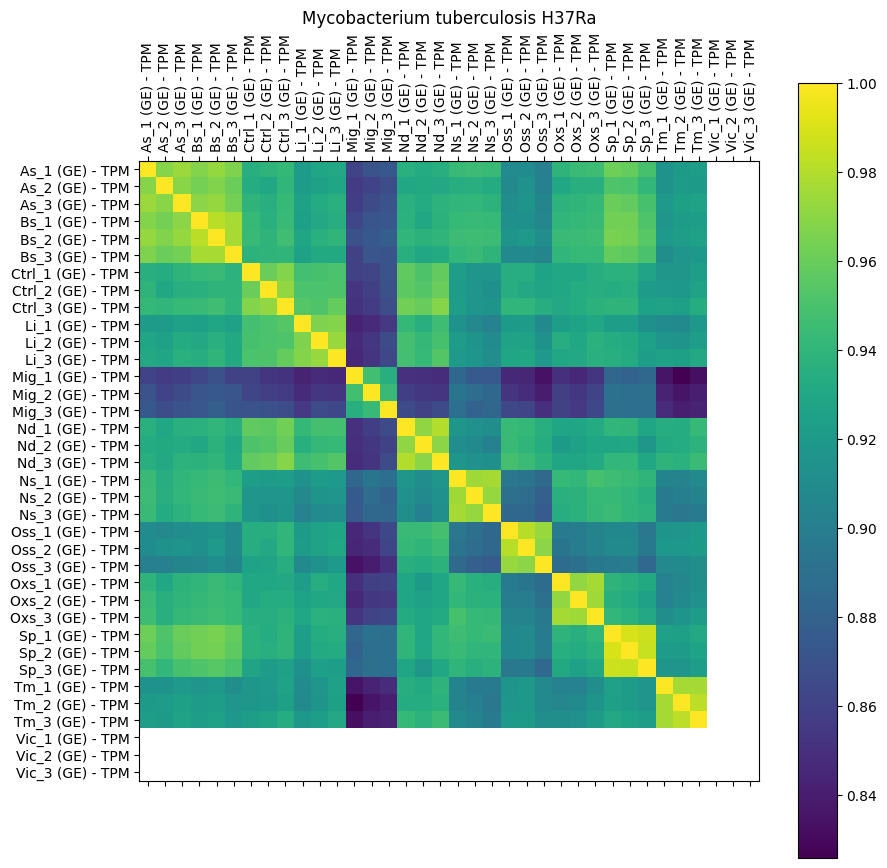

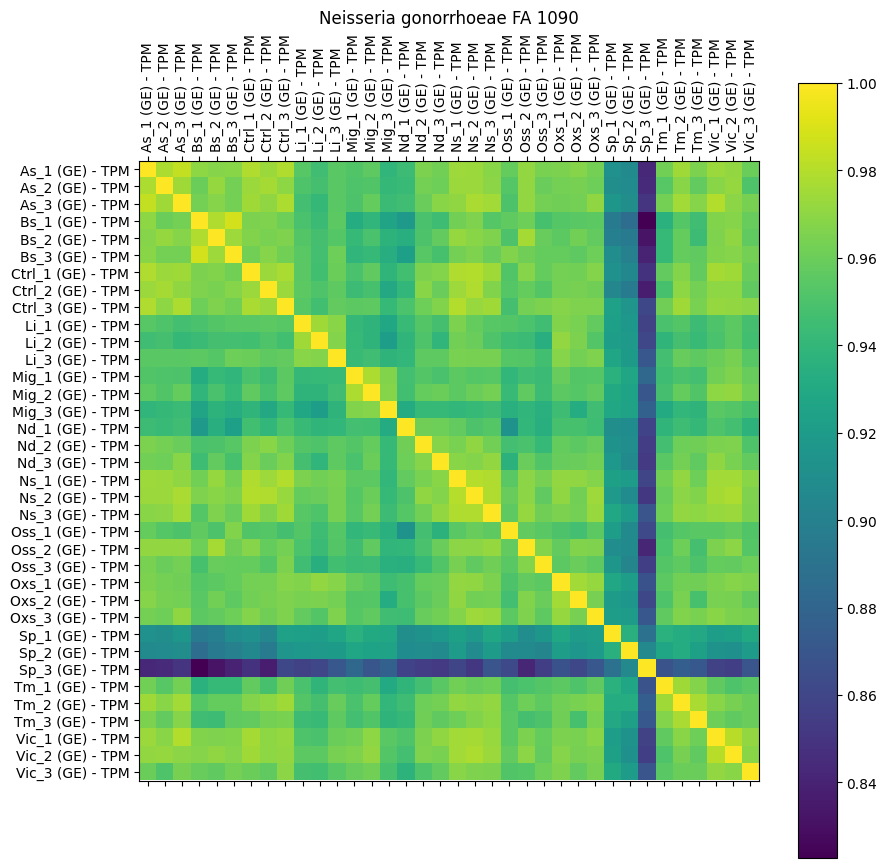

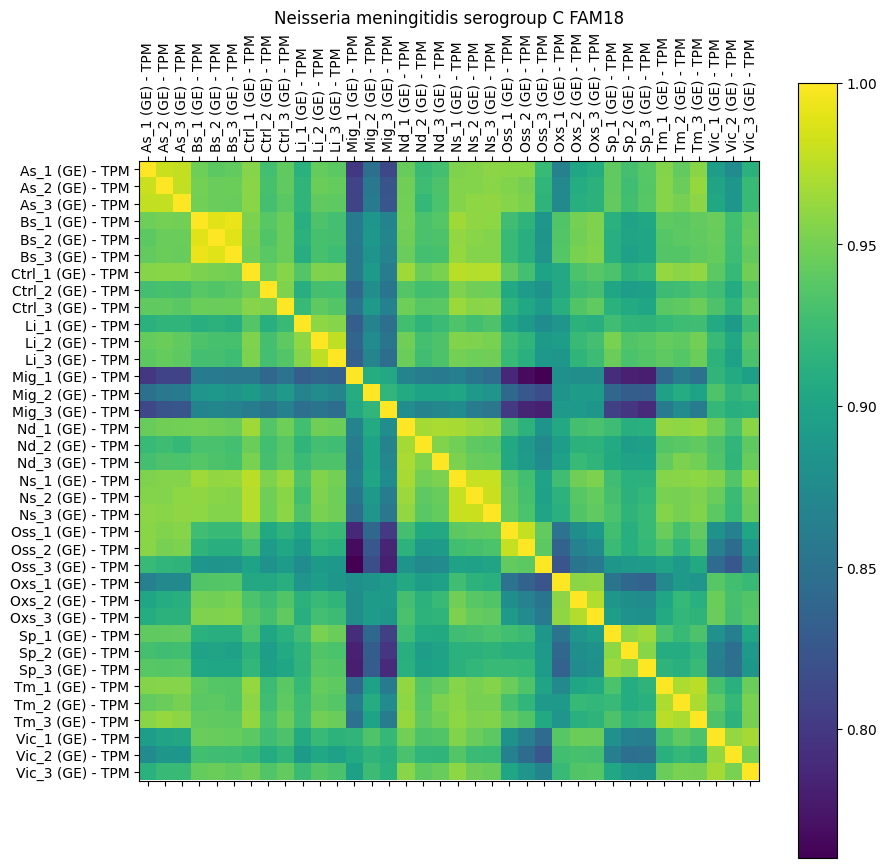

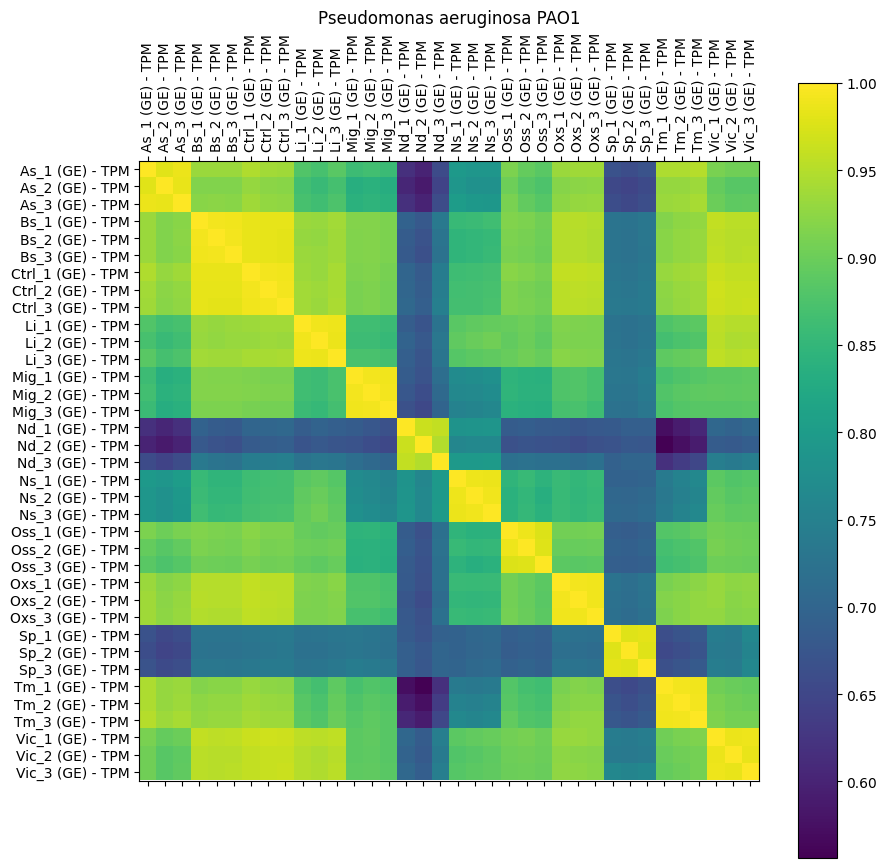

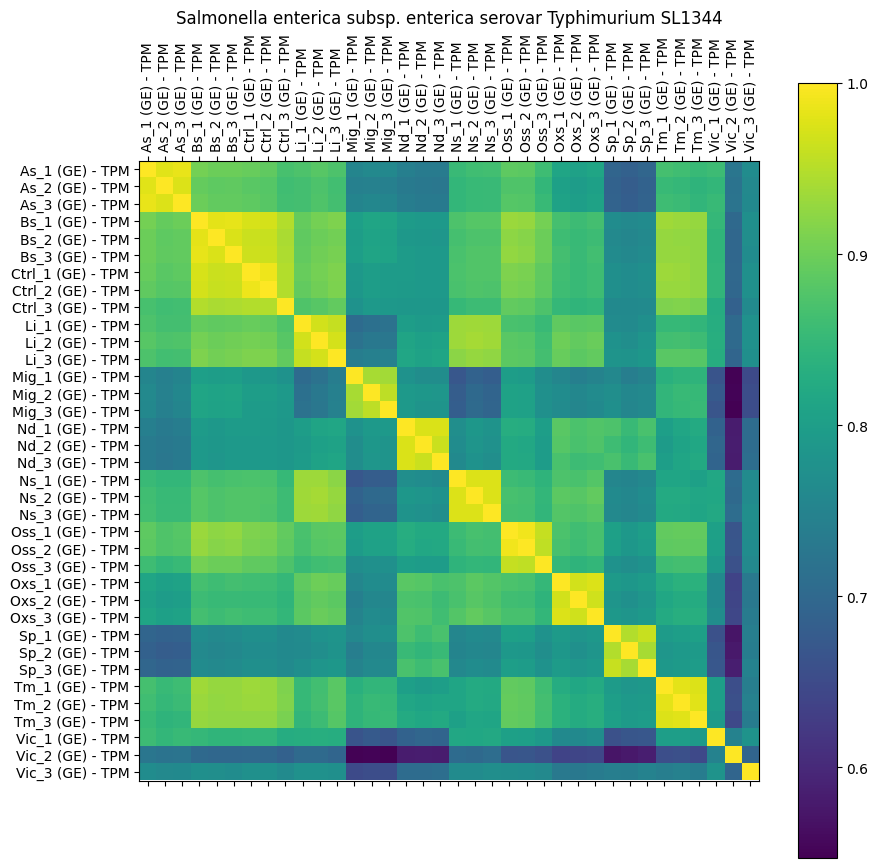

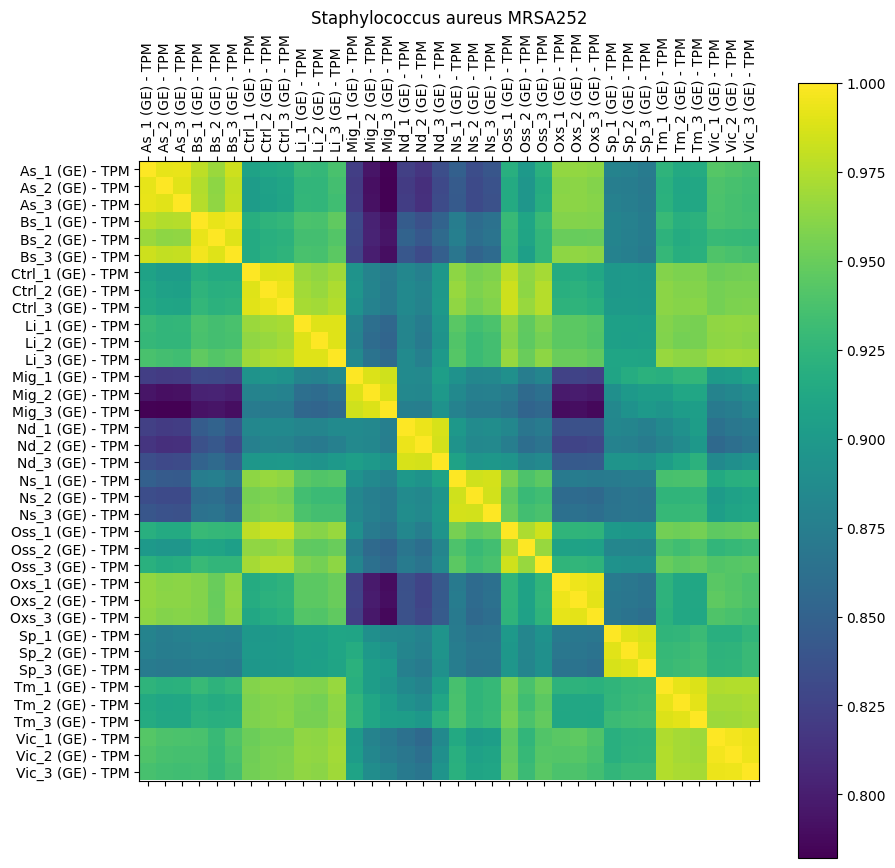

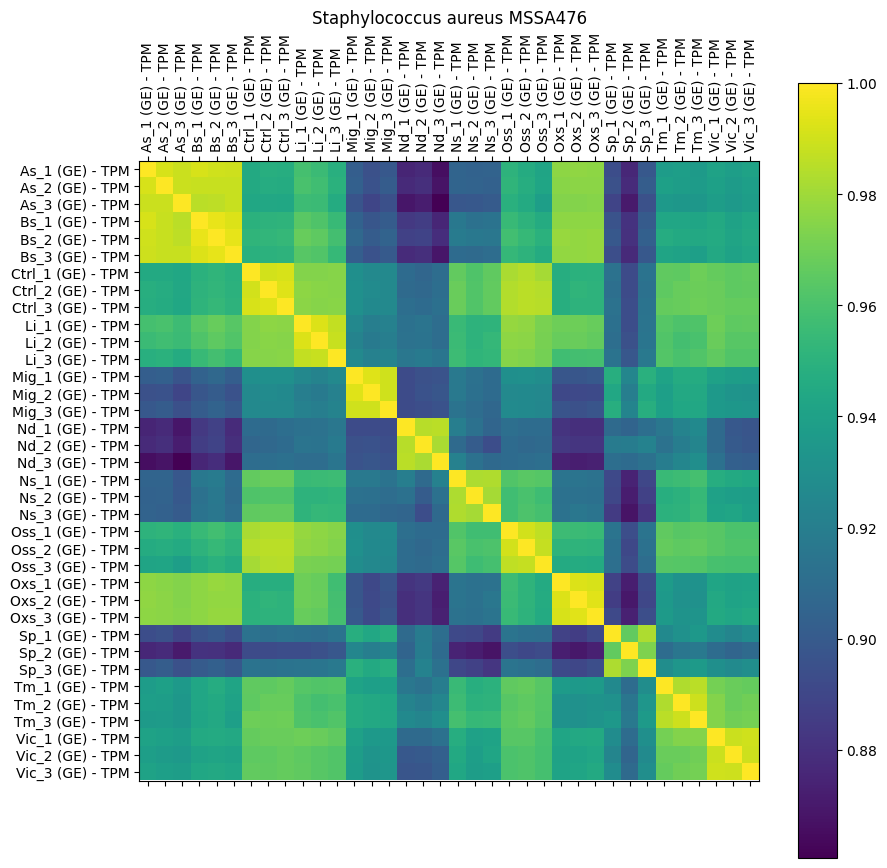

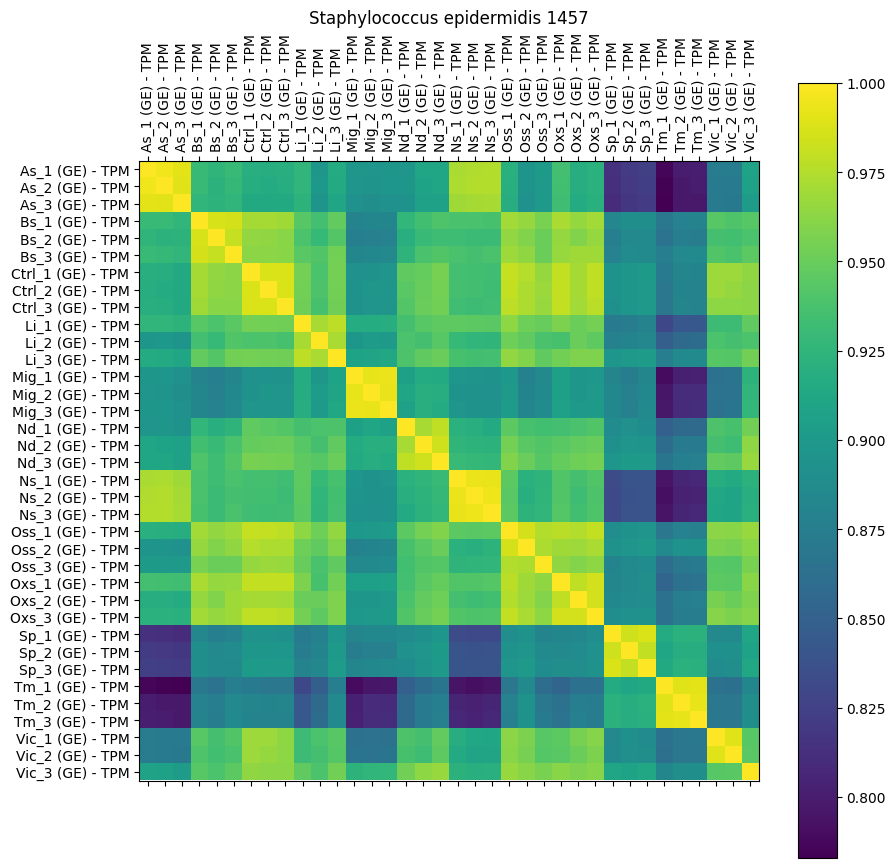

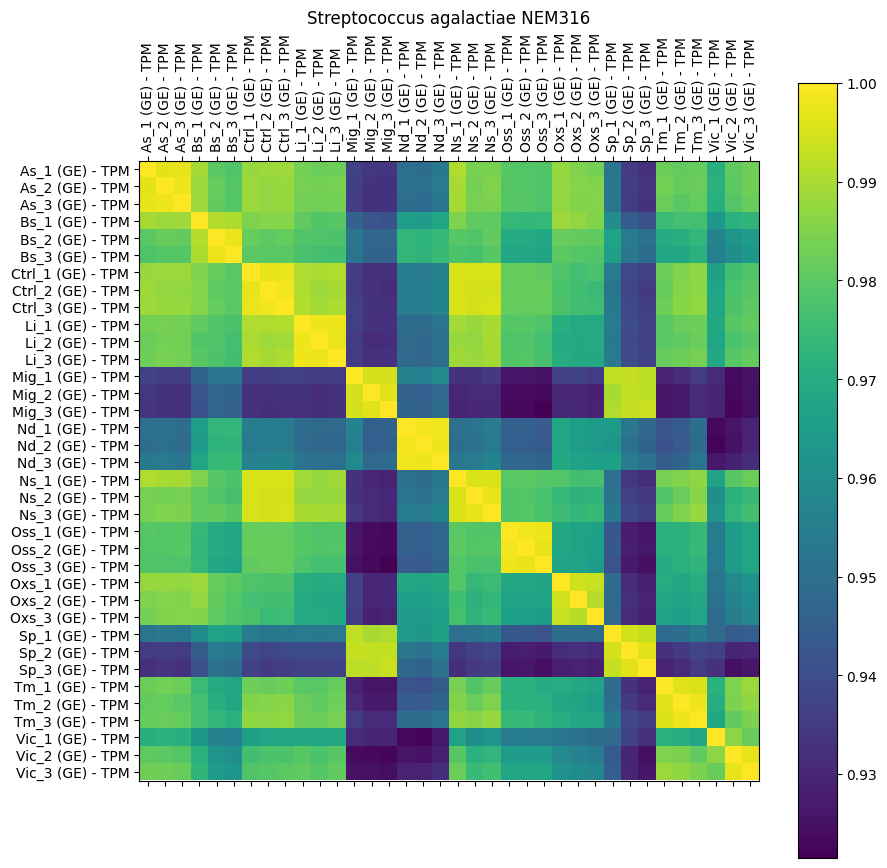

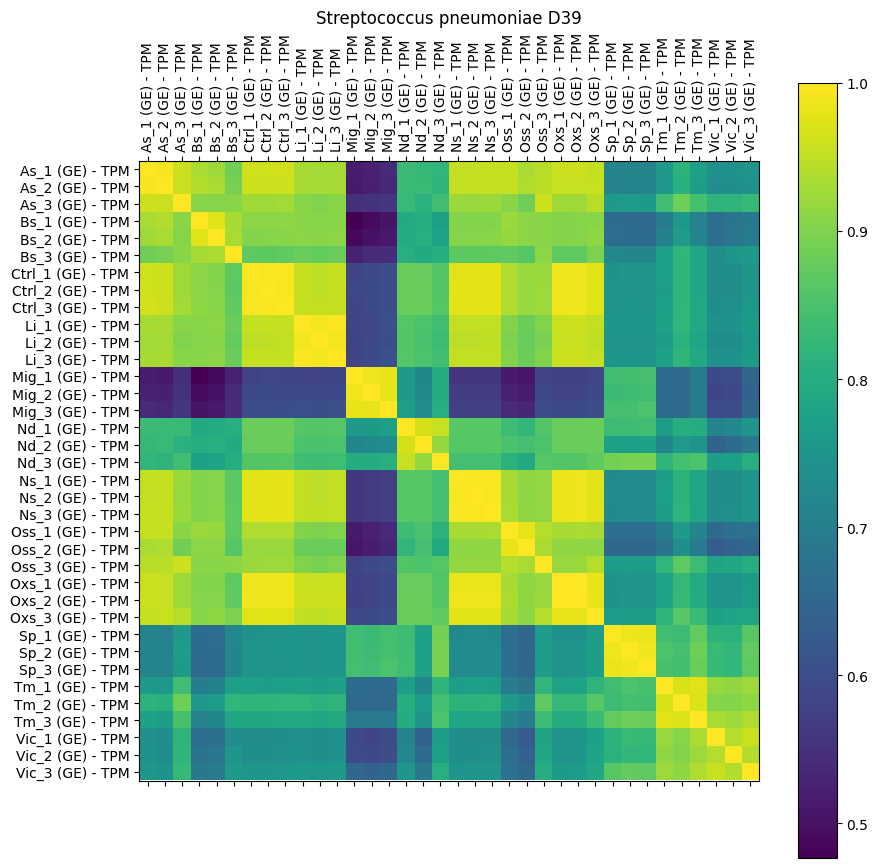

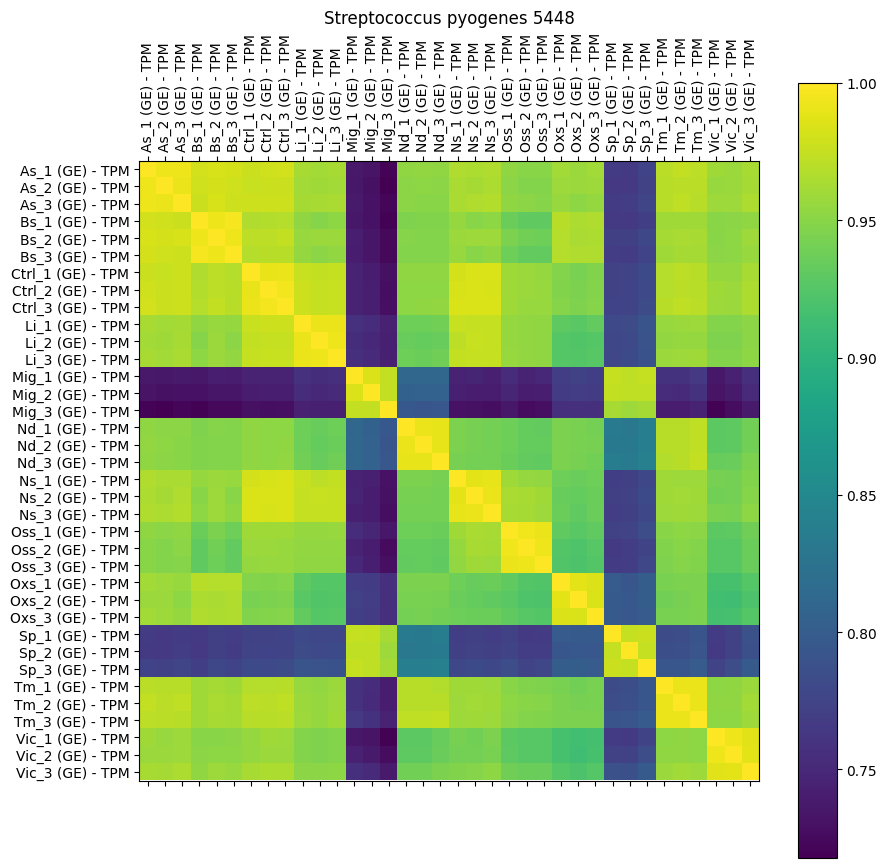

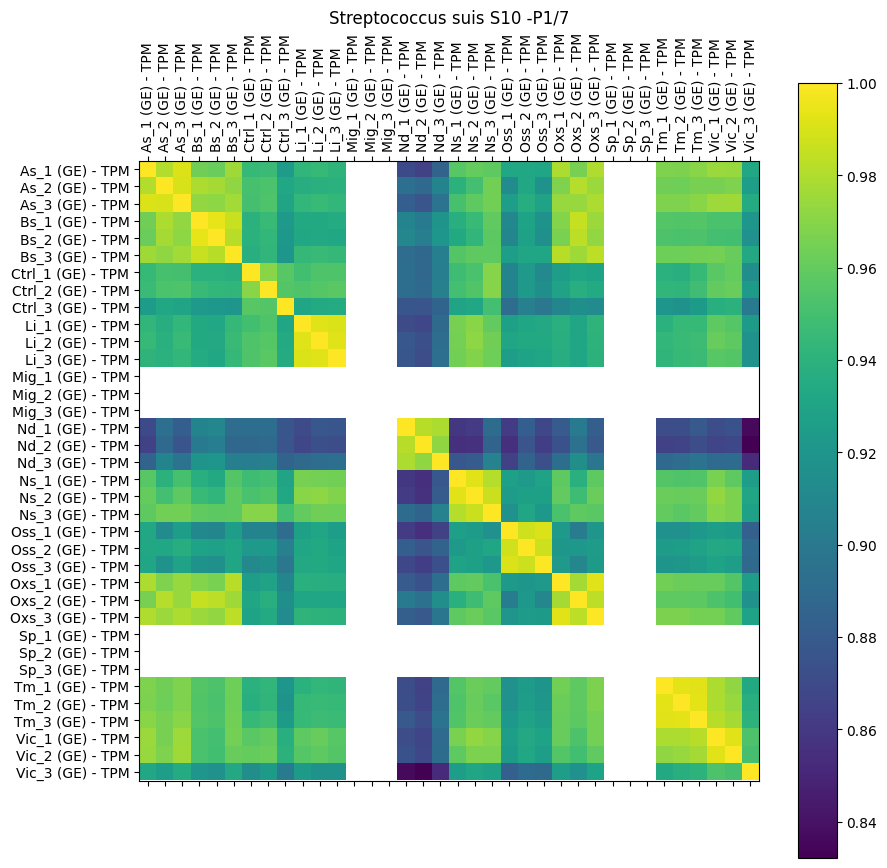

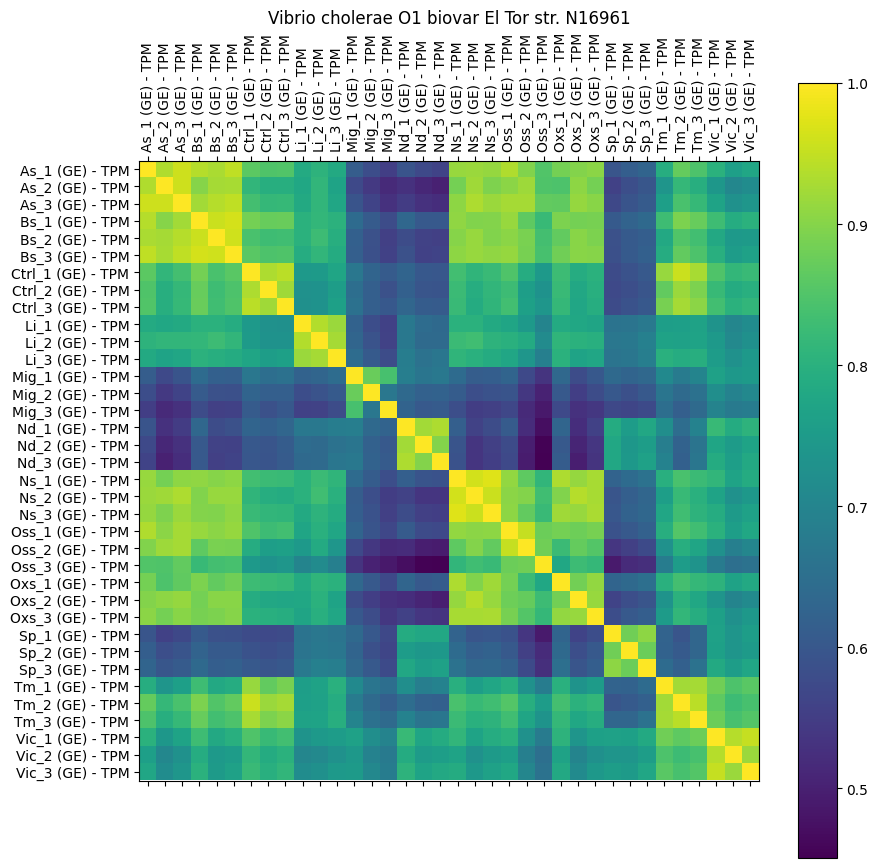

In [26]:
# plot correlations by species
species = full_dataset['Species'].unique()
species_dfs = {s: full_dataset[full_dataset['Species'] == s] for s in species}
species_corrs = {s: df[[name for name in df.columns if 'TPM' in name]].corr() for s, df in species_dfs.items()}
species_log_corrs = {s: np.log(df[[name for name in df.columns if 'TPM' in name]] + 1).corr() for s, df in species_dfs.items()}

r, c = 16, 2
curr_r, curr_c = 0, 0
figsize = 10

def plot_subplots():
    fig, axs = plt.subplots(r, c, sharex=True, sharey=True, figsize=(figsize, figsize))
    for i, (s, df) in enumerate(species_corrs.items()):
        ax = axs[curr_r, curr_c]

        ax.matshow(df)
        ax.set_title(s)
        ax.set_xticks(range(len(df.columns)))
        ax.set_xticklabels(df.columns, rotation='vertical')
        ax.set_yticks(range(len(df.columns)))
        ax.set_yticklabels(df.columns)

        if curr_r <= curr_c:
            ax.set_xticks([])


        curr_r, curr_c = curr_r + 1, curr_c
        if curr_r >= r:
            curr_r, curr_c = 0, curr_c + 1

    plt.show()

def plot_seqential(species_correlations):
    for i, (s, df) in enumerate(species_correlations.items()):
        fig = plt.figure(figsize=(figsize, figsize))
        plt.matshow(df, fignum=fig.number)
        plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
        plt.yticks(range(len(df.columns)), df.columns)
        plt.title(s)
        plt.colorbar()
        plt.show()

plot_seqential(species_log_corrs)